In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#CNN

Training of CNN

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 255, 255, 256)     3328      
                                                                 
 activation_9 (Activation)   (None, 255, 255, 256)     0         
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 127, 127, 256)     0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 126, 126, 128)     131200    
                                                                 
 activation_10 (Activation)  (None, 126, 126, 128)     0         
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 63, 63, 128)       0         
 g2D)                                                 

<ipython-input-5-aeebf18d2889>:66: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator,


Epoch 1/10
212/212 [==============================] - 98s 447ms/step - loss: 0.4147 - accuracy: 0.8602 - val_loss: 0.0418 - val_accuracy: 0.9858
Epoch 2/10
212/212 [==============================] - 88s 416ms/step - loss: 0.0619 - accuracy: 0.9779 - val_loss: 0.0062 - val_accuracy: 0.9976
Epoch 3/10
212/212 [==============================] - 88s 414ms/step - loss: 0.0513 - accuracy: 0.9858 - val_loss: 0.0085 - val_accuracy: 0.9941
Epoch 4/10
212/212 [==============================] - 90s 423ms/step - loss: 0.0178 - accuracy: 0.9947 - val_loss: 0.0092 - val_accuracy: 0.9976
Epoch 5/10
212/212 [==============================] - 93s 440ms/step - loss: 0.0276 - accuracy: 0.9903 - val_loss: 0.0028 - val_accuracy: 0.9988
Epoch 6/10
212/212 [==============================] - 88s 414ms/step - loss: 0.0242 - accuracy: 0.9917 - val_loss: 0.0019 - val_accuracy: 1.0000
Epoch 7/10
212/212 [==============================] - 95s 450ms/step - loss: 0.0189 - accuracy: 0.9947 - val_loss: 0.0013 - val_ac

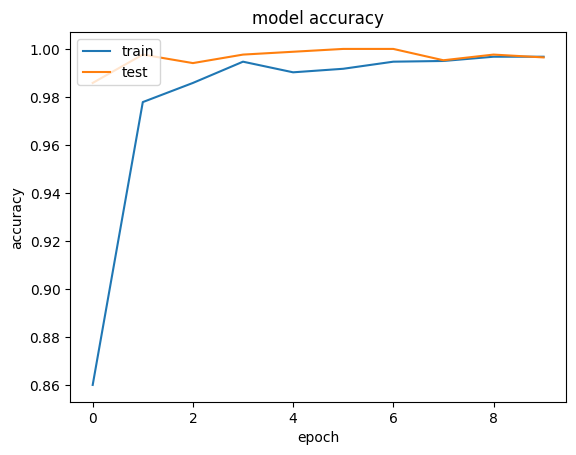

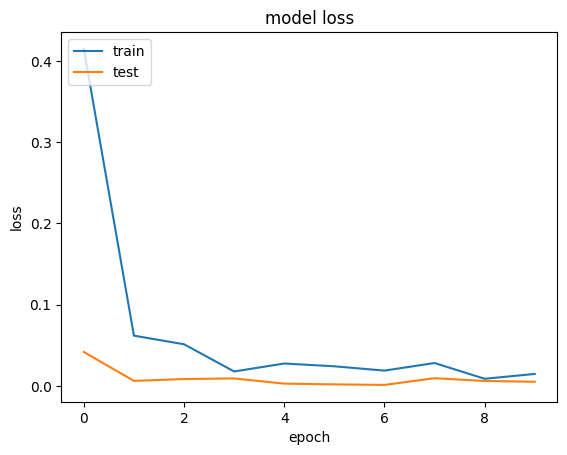

1027.6810610294342


In [5]:
# importing libraries
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K
from matplotlib import pyplot as plt
import time
import numpy as np
import tensorflow as tf
from sklearn.metrics import classification_report, confusion_matrix

start = time.time()
img_width, img_height = 256, 256

train_data_dir = '/content/drive/MyDrive/dataset/Train'
validation_data_dir = '/content/drive/MyDrive/dataset/Test'
nb_train_samples = 3407
nb_validation_samples = 850
epochs =10
batch_size = 16

input_shape = (img_width, img_height, 3)

model = Sequential()
model.add(Conv2D(256, (2, 2), input_shape = input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size =(2, 2)))

model.add(Conv2D(128, (2, 2)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size =(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(4, activation='softmax'))
model.summary()

model.compile(loss ='categorical_crossentropy',
                                        optimizer ='rmsprop',
                                metrics =['accuracy'])

train_datagen = ImageDataGenerator(
                                rescale = 1. / 255,
                                shear_range = 0.2,
                                zoom_range = 0.2,
                        horizontal_flip = True)

test_datagen = ImageDataGenerator(
                rescale = 1. / 255,
                shear_range = 0.2,
                                zoom_range = 0.2,
                        horizontal_flip = True)

train_generator = train_datagen.flow_from_directory(train_data_dir,
                                                    target_size =(img_width, img_height),
                                                    batch_size = batch_size, class_mode ='categorical')

validation_generator = test_datagen.flow_from_directory(validation_data_dir,
                                                        target_size =(img_width, img_height),
                                                        batch_size = batch_size, class_mode ='categorical',
                                                        shuffle=False)

history = model.fit_generator(train_generator,
        steps_per_epoch = nb_train_samples // batch_size,
        epochs = epochs, validation_data = validation_generator,
        validation_steps = nb_validation_samples // batch_size)

model.save_weights('model_saved.h5')

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('accuracy')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('loss')
plt.show()
end = time.time()
print(end - start)

Classification Report of CNN

In [7]:
#Confution Matrix and Classification Report
Y_pred = model.predict_generator(validation_generator)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(validation_generator.classes, y_pred))
print('Classification Report')
target_names = ['1','2','3','4']
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

<ipython-input-7-f0f6f9b2d6e4>:2: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  Y_pred = model.predict_generator(validation_generator)


Confusion Matrix
[[208   0   0   0]
 [  0 203   0   0]
 [  0   1 218   0]
 [  0   0   1 219]]
Classification Report
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       208
           2       1.00      1.00      1.00       203
           3       1.00      1.00      1.00       219
           4       1.00      1.00      1.00       220

    accuracy                           1.00       850
   macro avg       1.00      1.00      1.00       850
weighted avg       1.00      1.00      1.00       850



Confusion Matrix of CNN

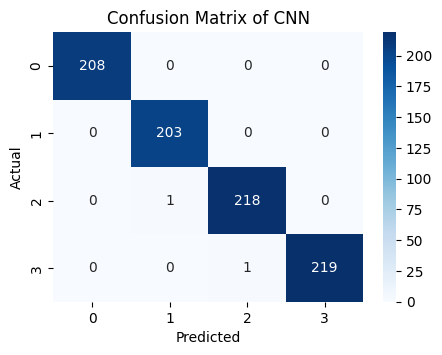

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

cm_matrix = confusion_matrix(validation_generator.classes, y_pred)

# Read the confusion matrix from Excel into a DataFrame
#df = pd.read_excel('abc.xlsx', index_col=0)

# Create a heatmap using seaborn
plt.figure(figsize=(5, 3.5))
sns.heatmap(cm_matrix, annot=True, cmap='Blues', fmt='d')

# Set the title and labels
plt.title('Confusion Matrix of CNN')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Save the plot as an image
plt.savefig('confusion_matrixcnn.png')